In [47]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json  # 用于将字符串解析为字典
# 读取CSV文件
data = pd.read_csv("/Users/zyt/Desktop/DL_finalproject/RandomResult/random_result.csv")




In [48]:
print(type(data['params'][0]))

<class 'str'>


In [49]:


# 第一步：将字符串转换为字典
data['params'] = data['params'].apply(lambda x: json.loads(x.replace("'", "\""))[0])  # 替换单引号，并提取列表的第一个元素

# 第二步：将字典列展开为独立列
params_df = pd.json_normalize(data['params'])  # 将字典列展开为独立列
data_expanded = pd.concat([data, params_df], axis=1).drop(columns=['params'])  # 合并展开后的列

# 查看结果
print("\n解包后的数据：")
print(data_expanded)




解包后的数据：
     param_index strategy  train_loss  val_loss  train_accuracy  val_accuracy  \
0              0   random    0.869295  0.709612       70.966667          79.4   
1              1   random    1.216673  0.862509       54.833333          76.0   
2              2   random    0.614520  0.501148       83.566667          88.2   
3              3   random    0.205463  0.305816       94.166667          91.2   
4              4   random    0.544141  0.503793       85.966667          87.8   
..           ...      ...         ...       ...             ...           ...   
995          995   random    1.710784  1.543487       29.066667          40.6   
996          996   random    1.573854  1.470052       36.200000          37.2   
997          997   random    1.316599  0.999999       55.433333          76.2   
998          998   random    0.526813  0.362802       82.766667          90.2   
999          999   random    0.171747  0.439229       94.700000          86.6   

     training_time

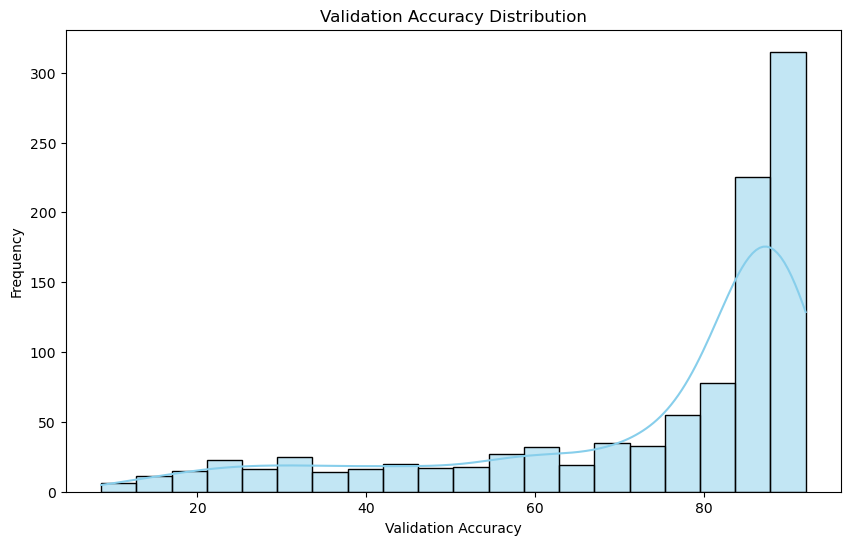

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(data_expanded['val_accuracy'], kde=True, bins=20, color="skyblue")
plt.title("Validation Accuracy Distribution")
plt.xlabel("Validation Accuracy")
plt.ylabel("Frequency")
plt.show()


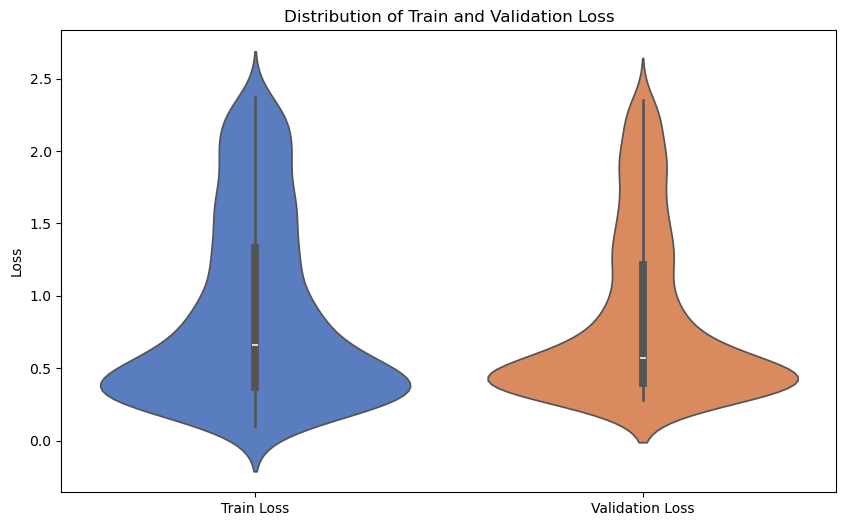

In [52]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_expanded[['train_loss', 'val_loss']], palette="muted")
plt.xticks([0, 1], ['Train Loss', 'Validation Loss'])
plt.title("Distribution of Train and Validation Loss")
plt.ylabel("Loss")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_28561/2275926322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_layers', y='val_accuracy', data=data_expanded, palette="pastel")


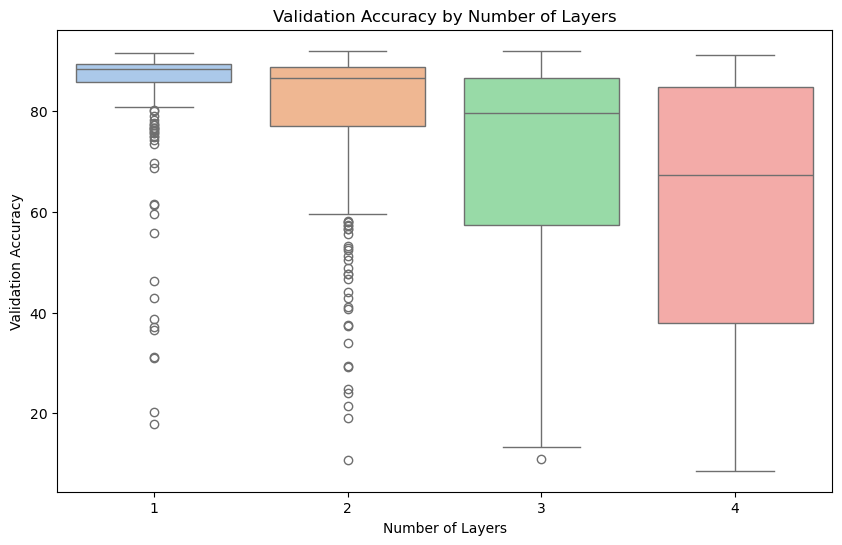

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_layers', y='val_accuracy', data=data_expanded, palette="pastel")
plt.title("Validation Accuracy by Number of Layers")
plt.xlabel("Number of Layers")
plt.ylabel("Validation Accuracy")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_28561/1598071194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activation', y='val_accuracy', data=data_expanded, palette="Set2")


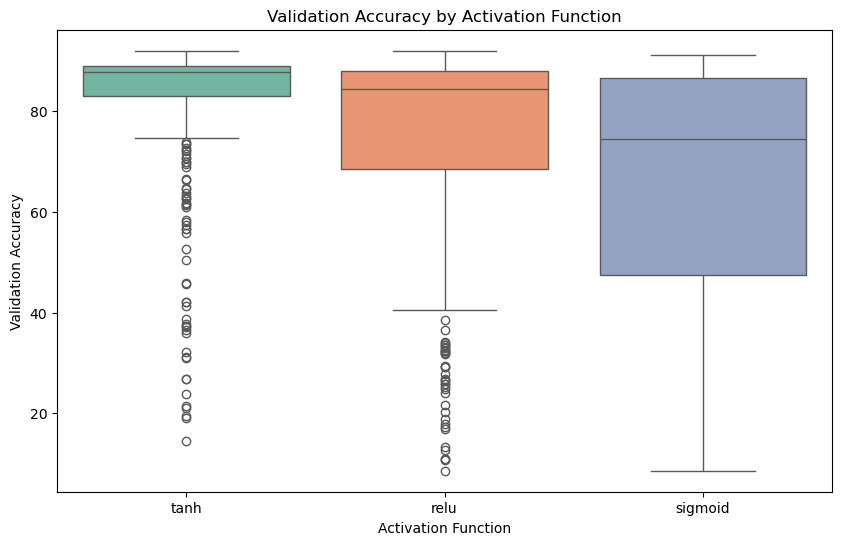

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='activation', y='val_accuracy', data=data_expanded, palette="Set2")
plt.title("Validation Accuracy by Activation Function")
plt.xlabel("Activation Function")
plt.ylabel("Validation Accuracy")
plt.show()


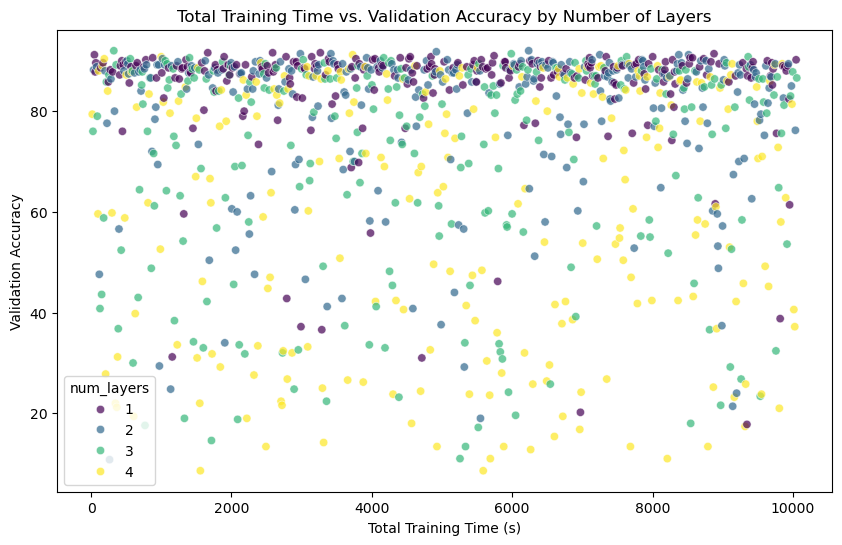

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_training_time', y='val_accuracy', hue='num_layers', data=data_expanded, palette="viridis", alpha=0.7)
plt.title("Total Training Time vs. Validation Accuracy by Number of Layers")
plt.xlabel("Total Training Time (s)")
plt.ylabel("Validation Accuracy")
plt.show()
